In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

loaded and resized image


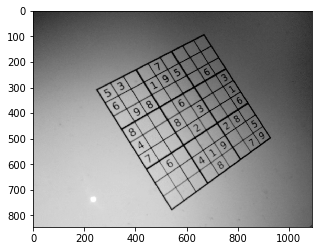

filtering
blur and adaptive threshold


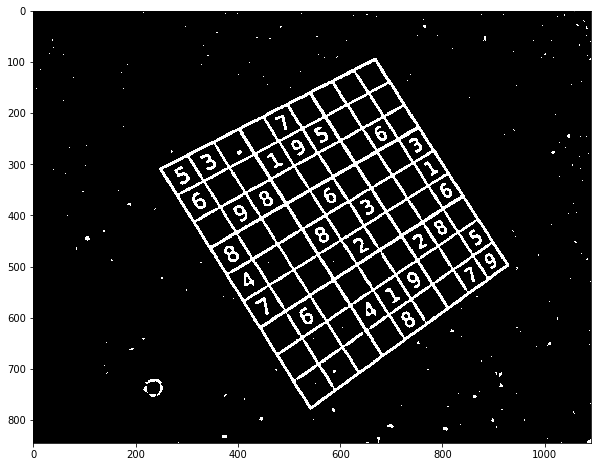

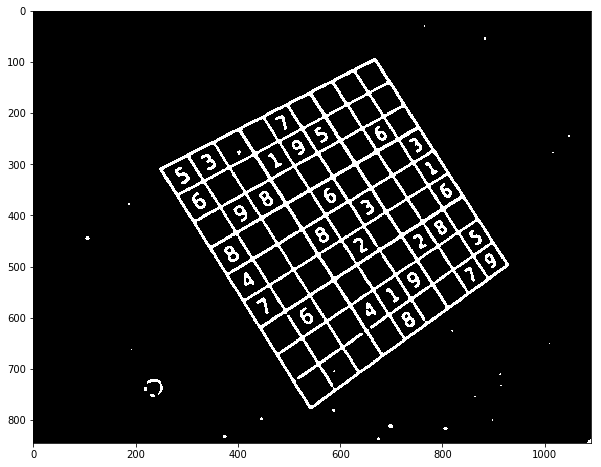

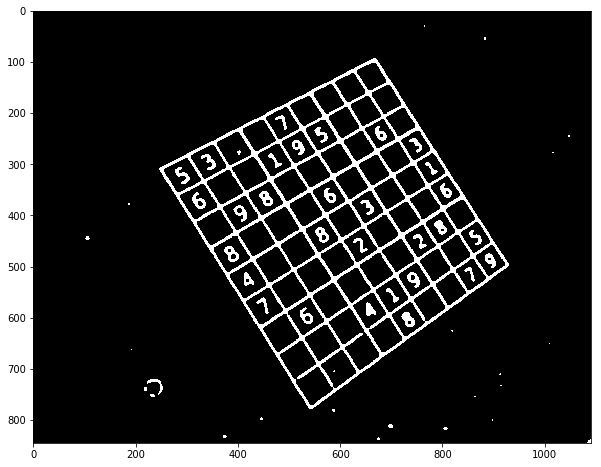

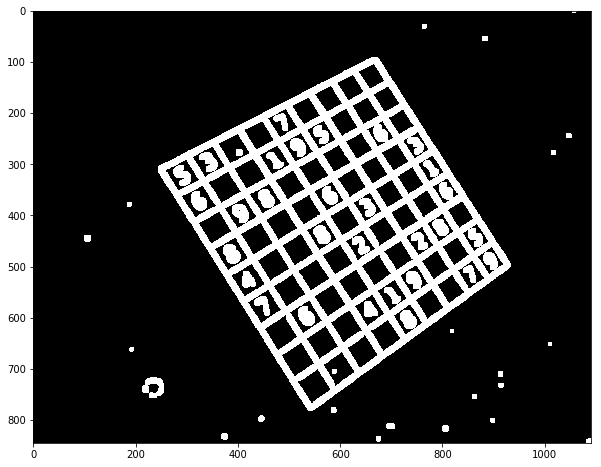

final filtered image


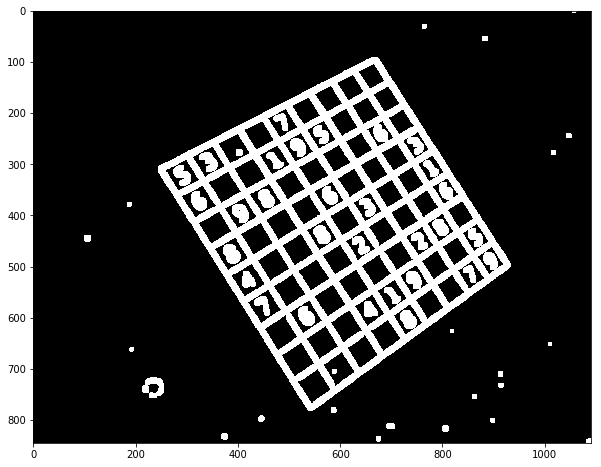

In [67]:
def filter_image(img, show_stages=True):
    DESIRABLE_AREA = 1280 * 720
#     DESIRABLE_AREA = 480 * 360
    current_area = img.shape[0]*img.shape[1]
    ratio =  DESIRABLE_AREA/current_area
#     print(DESIRABLE_AREA, current_area, img.shape, ratio, ratio**0.5)
    
    img = cv2.resize(img, (0,0), fx=ratio**0.5, fy=ratio**0.5)
#     current_area = img.shape[0]*img.shape[1]
#     print(DESIRABLE_AREA, current_area, img.shape, DESIRABLE_AREA/current_area)
#     return
    if show_stages:
        print("loaded and resized image")
    if show_stages:
        plt.figure(figsize=(5, 5))
        plt.imshow(img, cmap='gray')
        plt.show()
    if show_stages:
        print("filtering")
    if show_stages:
        print("blur and adaptive threshold")
#     blur = cv2.medianBlur(img, 7)
    blur = cv2.bilateralFilter(img,9,75,75)
    th = 255-cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11,2)
    if show_stages:
        plt.figure(figsize=(10,10))
        plt.imshow(th, cmap="gray")
        plt.show()
    
    blur2 = cv2.medianBlur(th, 7)
    if show_stages:
        plt.figure(figsize=(10,10))
        plt.imshow(blur2, cmap="gray")
        plt.show()
    
    kernel = np.ones((5,5),np.uint8)
    opening = cv2.morphologyEx(blur2, cv2.MORPH_CLOSE, kernel)
    if show_stages:
        plt.figure(figsize=(10,10))
        plt.imshow(opening, cmap="gray")
        plt.show()

    kernel = np.ones((7,7),np.uint8)
    dilation = cv2.dilate(opening,kernel,iterations = 1)
    if show_stages:
        plt.figure(figsize=(10,10))
        plt.imshow(dilation, cmap="gray")
        plt.show()
    
    res = dilation
    if show_stages:
        print("final filtered image")
    if show_stages:
        plt.figure(figsize=(10,10))
        plt.imshow(res, cmap="gray")
        plt.show()
    return res

img = cv2.imread("pics/test1.jpg", cv2.IMREAD_GRAYSCALE )    
filtered_img = filter_image(img)

test1.jpg
elapsed time(ms) 106.534


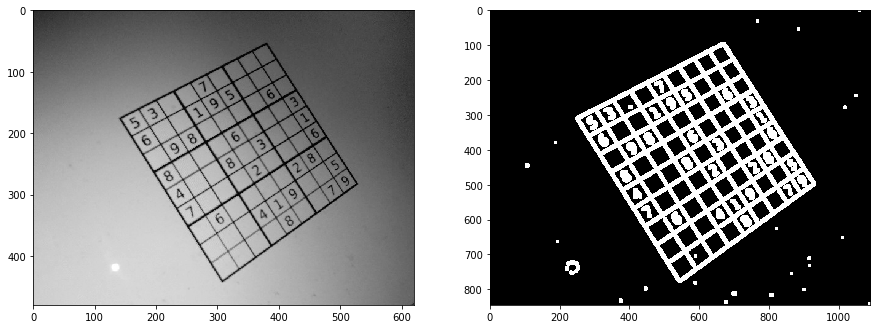

test10.jpg
elapsed time(ms) 110.23


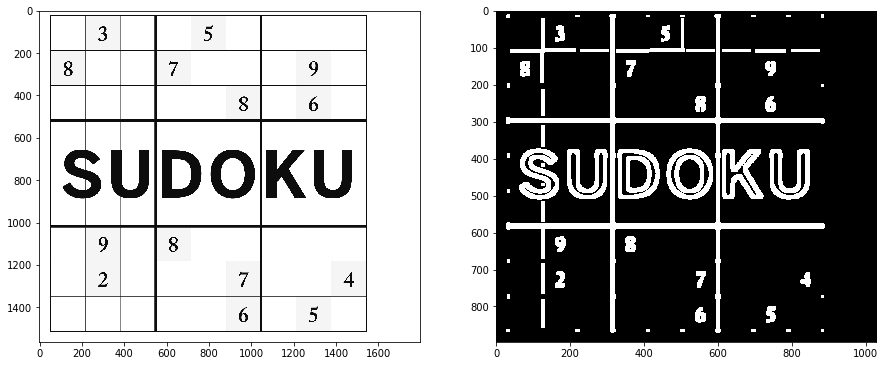

test11.jpg
elapsed time(ms) 107.669


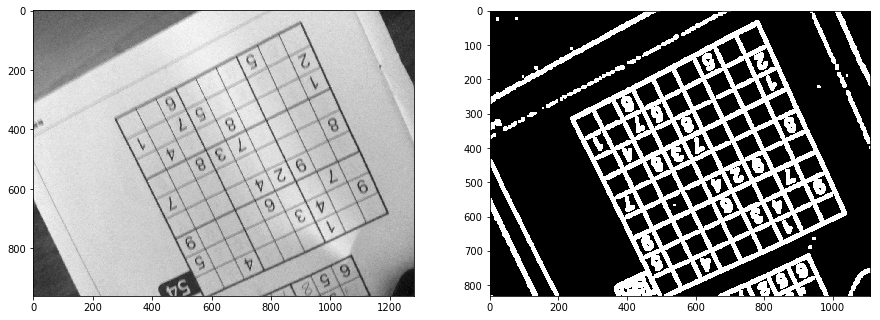

test12.jpg
elapsed time(ms) 119.612


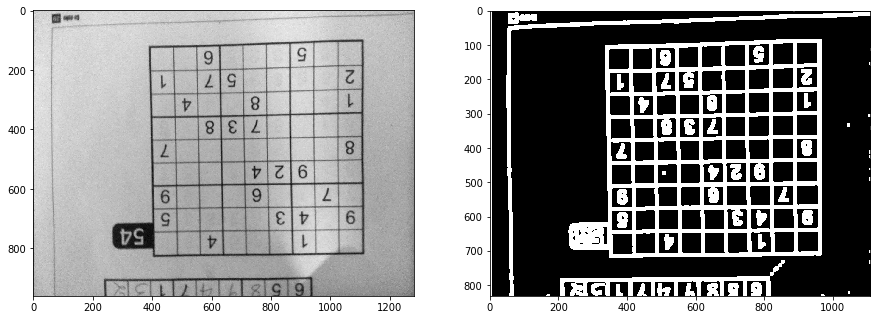

test2.jpg
elapsed time(ms) 119.492


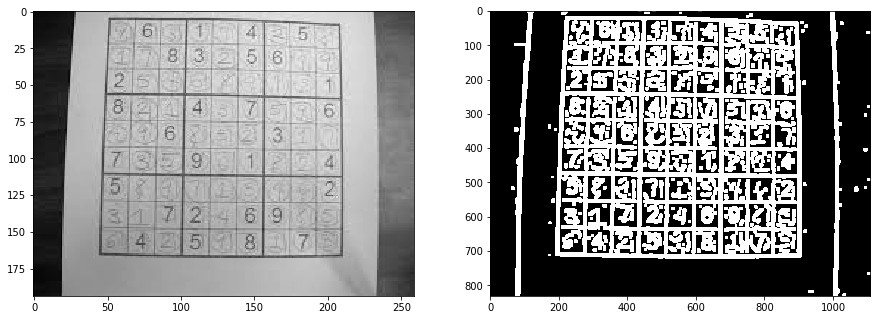

test3.jpg
elapsed time(ms) 115.003


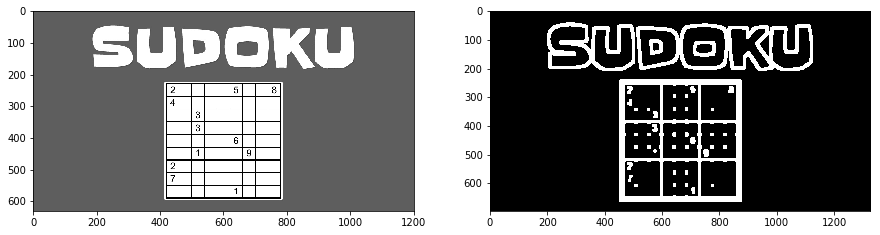

test4.jpg
elapsed time(ms) 118.868


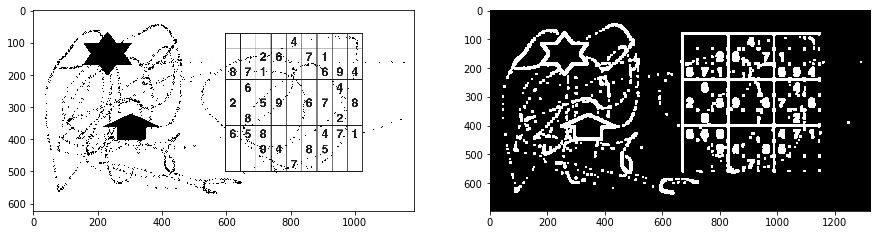

test5.jpg
elapsed time(ms) 104.128


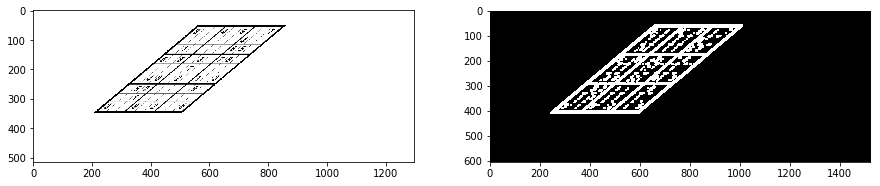

test6.jpg
elapsed time(ms) 123.762


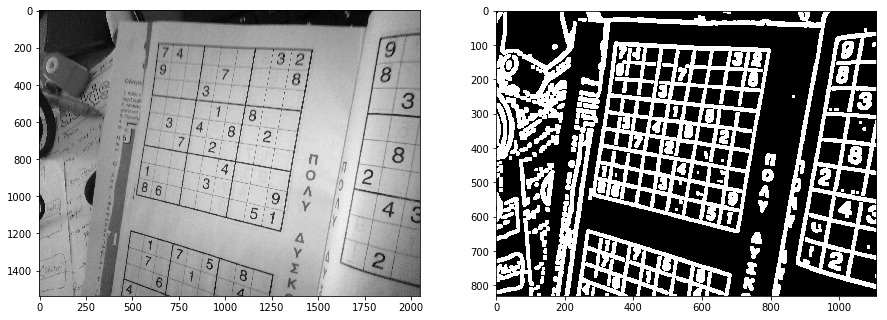

test7.jpg
elapsed time(ms) 124.664


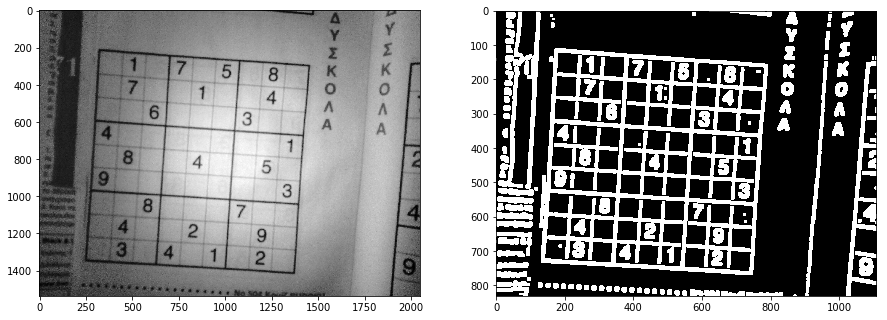

test8.jpg
elapsed time(ms) 110.483


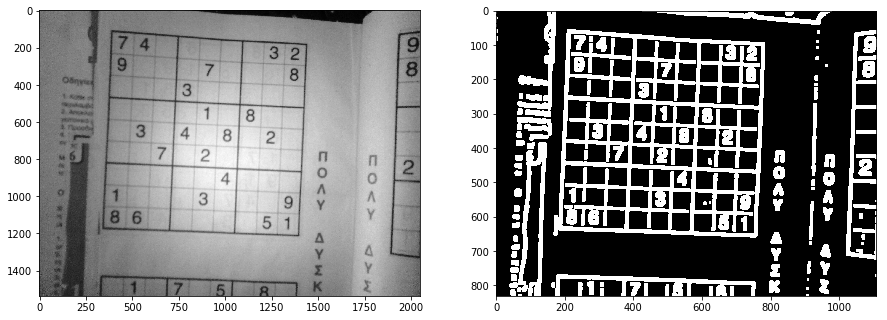

test9.jpg
elapsed time(ms) 113.605


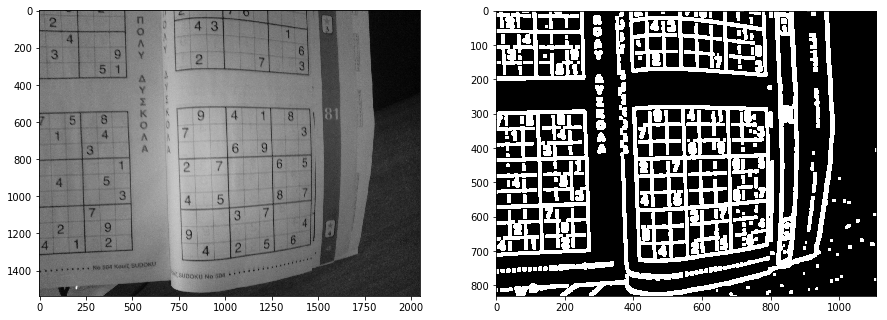

In [68]:
import os
import datetime

for file in os.listdir("pics"):
    print(file)
    path = "pics/"+file
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE )
    # img = cv2.equalizeHist(img)
    start = datetime.datetime.now()
    res = filter_image(img, show_stages=False)
    elapsed = datetime.datetime.now()-start
    print("elapsed time(ms)", elapsed.microseconds/1000)
    plt.figure(figsize=(15,15))
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap="gray")
    plt.subplot(1, 2, 2)
    plt.imshow(res, cmap="gray")
    plt.show()
